In [3]:
import pandas as pd
import datetime as dt

# List of CSV names
csv_names_2019 = ['yellow_tripdata_2019-01.csv', 'yellow_tripdata_2019-02.csv', 'yellow_tripdata_2019-03.csv',
                  'yellow_tripdata_2019-04.csv', 'yellow_tripdata_2019-05.csv', 'yellow_tripdata_2019-06.csv']

csv_names_2019_cleaned = ['yellow_tripdata_2019-01_cleaned_complete.csv', 'yellow_tripdata_2019-02_cleaned_complete.csv',
                          'yellow_tripdata_2019-03_cleaned_complete.csv','yellow_tripdata_2019-04_cleaned_complete.csv',
                          'yellow_tripdata_2019-05_cleaned_complete.csv', 'yellow_tripdata_2019-06_cleaned_complete.csv']

new_csv_index = 0

for csv_name_value in csv_names_2019:
    #Read CSV    
    taxi = pd.read_csv(csv_name_value)
    
    # drop null value
    #taxi = taxi.dropna(axis = 0)
    
    # Store only the coumn which are needed
    taxi = taxi.loc[:,["tpep_pickup_datetime","passenger_count","trip_distance","PULocationID","DOLocationID","tip_amount","total_amount"]]
    
    # Remove rows with Zero passenger count
    taxi = taxi.loc[taxi["passenger_count"] > 0,:]
    taxi = taxi.loc[taxi["passenger_count"] < 10,:]

    # Remove rows with Zero trip distance
    taxi = taxi[taxi["trip_distance"] > 0]

    # Remove rows with total amount equal to zero
    taxi = taxi[taxi["total_amount"] > 0]

    # Store day,month,year of pickup in a new column
    taxi["month"] = pd.DatetimeIndex(taxi["tpep_pickup_datetime"]).month
    taxi["year"] = pd.DatetimeIndex(taxi["tpep_pickup_datetime"]).year
    taxi["day"] = pd.DatetimeIndex(taxi["tpep_pickup_datetime"]).day
    
    # Remove garbage values with year and months exceedingly high or low
    taxi = taxi[taxi["year"] == 2019]
    taxi = taxi[taxi["month"] == new_csv_index + 1]
    
    # Convert tpep_pickup_datetime into datetime object so that their format can be changed
    taxi["tpep_pickup_datetime"] = pd.DatetimeIndex(taxi["tpep_pickup_datetime"])
    taxi['tpep_pickup_datetime'] = taxi['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')
    
    #Create new CSV file 
    taxi.to_csv(csv_names_2019_cleaned[new_csv_index])
    new_csv_index = new_csv_index + 1  
        

In [4]:
import pandas as pd
import datetime as dt

# List of CSV names
csv_names_2020 = [ 'yellow_tripdata_2020-01.csv', 'yellow_tripdata_2020-02.csv', 'yellow_tripdata_2020-03.csv',
                  'yellow_tripdata_2020-04.csv', 'yellow_tripdata_2020-05.csv','yellow_tripdata_2020-06.csv']

csv_names_2020_cleaned = ['yellow_tripdata_2020-01_cleaned_complete.csv', 'yellow_tripdata_2020-02_cleaned_complete.csv',
                          'yellow_tripdata_2020-03_cleaned_complete.csv','yellow_tripdata_2020-04_cleaned_complete.csv',
                          'yellow_tripdata_2020-05_cleaned_complete.csv', 'yellow_tripdata_2020-06_cleaned_complete.csv']

new_csv_index = 0

for csv_name_value in csv_names_2020:
    #Read CSV 
    taxi = pd.read_csv(csv_name_value)
    
    # drop null value
    #taxi = taxi.dropna(axis = 0)
    
    # Store only the coumn which are needed
    taxi = taxi.loc[:,["tpep_pickup_datetime","passenger_count","trip_distance","PULocationID","DOLocationID","tip_amount","total_amount"]]

    # Remove rows with Zero passenger count
    taxi = taxi.loc[taxi["passenger_count"] > 0,:]
    taxi = taxi.loc[taxi["passenger_count"] < 10,:]

    # Remove rows with Zero trip distance
    taxi = taxi[taxi["trip_distance"] > 0]

    # Remove rows with total amount equal to zero
    taxi = taxi[taxi["total_amount"] > 0]

    # Store month of pickup in a new column
    taxi["month"] = pd.DatetimeIndex(taxi["tpep_pickup_datetime"]).month
    taxi["year"] = pd.DatetimeIndex(taxi["tpep_pickup_datetime"]).year
    taxi["day"] = pd.DatetimeIndex(taxi["tpep_pickup_datetime"]).day
    
    # Remove garbage values with year and months exceedingly high or low
    taxi = taxi[taxi["year"] == 2020]
    taxi = taxi[taxi["month"] == new_csv_index + 1]
    
    # Convert tpep_pickup_datetime into datetime object so that their format can be changed
    taxi["tpep_pickup_datetime"] = pd.DatetimeIndex(taxi["tpep_pickup_datetime"])
    taxi['tpep_pickup_datetime'] = taxi['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')
    
    #Create new CSV file 
    taxi.to_csv(csv_names_2020_cleaned[new_csv_index])
    new_csv_index = new_csv_index + 1

C:\Users\akhau\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
import pandas as pd
import datetime as dt

# List of CSV names
csv_names_2019 = ['yellow_tripdata_2019-01_cleaned_complete.csv', 'yellow_tripdata_2019-02_cleaned_complete.csv',
                  'yellow_tripdata_2019-03_cleaned_complete.csv','yellow_tripdata_2019-04_cleaned_complete.csv',
                  'yellow_tripdata_2019-05_cleaned_complete.csv', 'yellow_tripdata_2019-06_cleaned_complete.csv']

csv_names_2020 = ['yellow_tripdata_2020-01_cleaned_complete.csv', 'yellow_tripdata_2020-02_cleaned_complete.csv',
                  'yellow_tripdata_2020-03_cleaned_complete.csv','yellow_tripdata_2020-04_cleaned_complete.csv',
                  'yellow_tripdata_2020-05_cleaned_complete.csv', 'yellow_tripdata_2020-06_cleaned_complete.csv']

# varibales to store the values for the charts and graphs
passenger_count_month_2019 = []
passenger_count_month_2020 = []
freq_everday = []
jfk_2019 = []
Newark_Airport_2019 = []
LaGuardi_Airport_2019 = []
jfk_2020 = []
Newark_Airport_2020 = []
LaGuardi_Airport_2020 = []
result = [];

for csv_name_value in csv_names_2019:
    taxi = pd.read_csv(csv_name_value)
    passenger_count_month_2019.append(taxi["passenger_count"].sum())
    jfk_2019.append(taxi.loc[taxi["DOLocationID"] == 132,"DOLocationID"].count())
    Newark_Airport_2019.append(taxi.loc[taxi["DOLocationID"] == 1,"DOLocationID"].count())
    LaGuardi_Airport_2019.append(taxi.loc[taxi["DOLocationID"] == 138,"DOLocationID"].count())
    value = taxi["DOLocationID"].value_counts().nlargest(20)
    result.append(value)
    
for csv_name_value in csv_names_2020:
    taxi = pd.read_csv(csv_name_value)
    passenger_count_month_2020.append(taxi["passenger_count"].sum())
    freq = taxi["day"].value_counts().sort_index();
    freq_everday.append(freq)
    jfk_2020.append(taxi.loc[taxi["DOLocationID"] == 132,"DOLocationID"].count())
    Newark_Airport_2020.append(taxi.loc[taxi["DOLocationID"] == 1,"DOLocationID"].count())
    LaGuardi_Airport_2020.append(taxi.loc[taxi["DOLocationID"] == 138,"DOLocationID"].count())
    value = taxi["DOLocationID"].value_counts().nlargest(20)
    result.append(value)

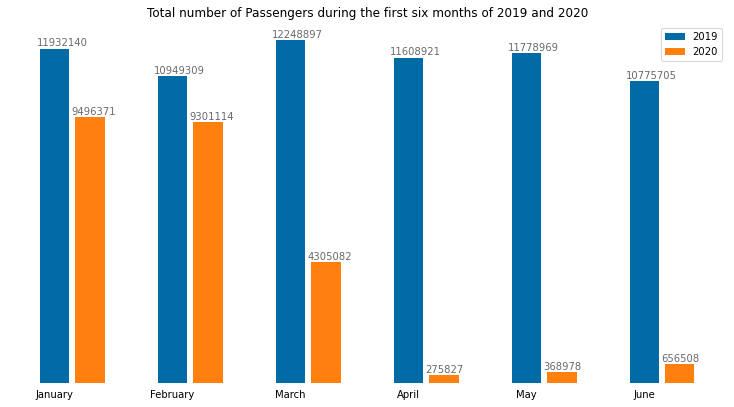

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import arange

%matplotlib inline

months = ['January', 'February', 'March', 'April', 'May', 'June']
bar1 = np.arange(len(months))
bar2 = [i+0.30 for i in bar1]
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(bar1, passenger_count_month_2019, color = (0/255, 107/255, 164/255), width = 0.25, label = "2019")
ax.bar(bar2, passenger_count_month_2020, color = (255/255, 128/255, 14/255), width = 0.25, label = "2020")
ax.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+100000, \
            str(int(i.get_height())), fontsize=10,
                color='dimgrey')
ax.set_title('Total number of Passengers during the first six months of 2019 and 2020')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.xticks(bar1,months)
plt.legend()
plt.show()


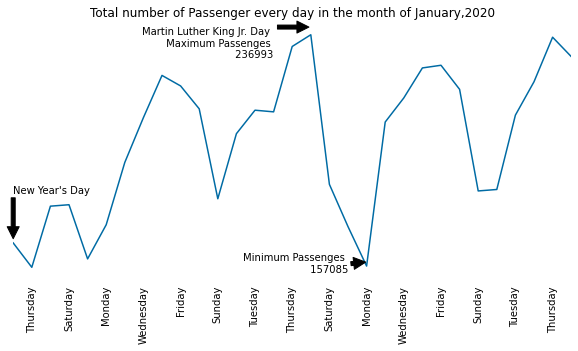

In [9]:
def generateXTiCkLabels(labels):
    days = ["Wednesday","Thursday","Friday","Saturday","Sunday","Monday","Tuesday"]
    daysIndex = 1
    for i in range(1,17):
        daysIndex = daysIndex % 7
        labels[i] = days[(daysIndex)]
        daysIndex = daysIndex + 2        
    return labels


fig = plt.figure(figsize=(10,16))
ax= fig.add_subplot(3,1,1)

ax.plot(freq_everday[0],c=(0/255, 107/255, 164/255))
ax.set_title('Total number of Passenger every day in the month of January,2020')
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.annotate("New Year's Day",
            xy=(1, 165003),
            xycoords='data',
            xytext=(1, 183000),
            arrowprops=
                dict(facecolor='black', shrink=0.00),
                horizontalalignment='left',
                verticalalignment='top')
ax.annotate('Martin Luther King Jr. Day \n Maximum Passenges \n 236993',
            xy=(17, 236993),
            xycoords='data',
            xytext=(15, 236993),
            arrowprops=
                dict(facecolor='black', shrink=0.05),
                horizontalalignment='right',
                verticalalignment='top')
ax.annotate('Minimum Passenges \n 157085',
            xy=(20, 157085),
            xycoords='data',
            xytext=(19, 160085),
            arrowprops=
                dict(facecolor='black', shrink=0.05),
                horizontalalignment='right',
                verticalalignment='top')
ax.tick_params(top="off", left="off", right="off")
ax.set_xlim(1, 31)
ax.get_yaxis().set_visible(False)
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = generateXTiCkLabels(labels)
ax.set_xticklabels(labels)

plt.xticks(rotation=90)
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.show()


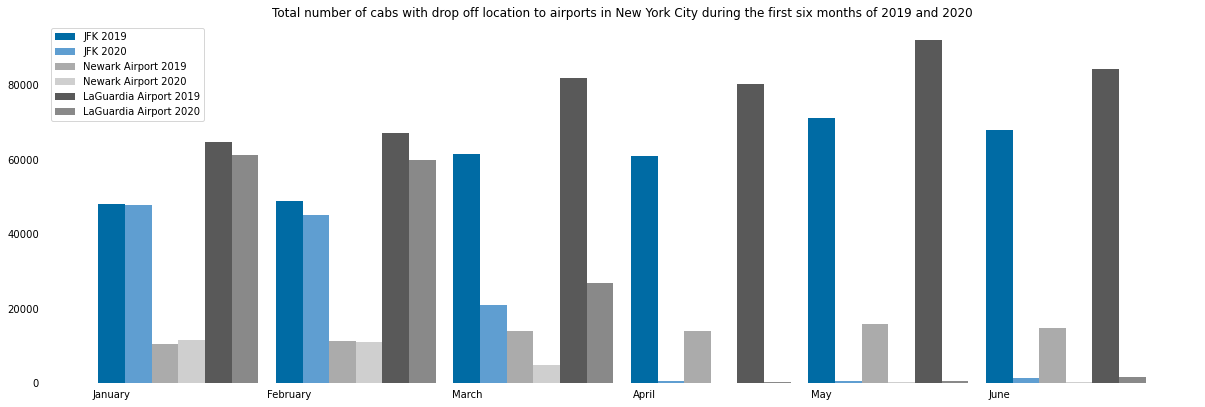

In [10]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from numpy import arange

months = ['January', 'February', 'March', 'April', 'May', 'June']
bar1 = np.arange(len(months))
bar2 = [i+0.15 for i in bar1]
bar3 = [i+0.15 for i in bar2]
bar4 = [i+0.15 for i in bar3]
bar5 = [i+0.15 for i in bar4]
bar6 = [i+0.15 for i in bar5]
fig = plt.figure(figsize=(16,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(bar1, jfk_2019, color = (0/255, 107/255, 164/255), width = 0.15, label = "JFK 2019")
ax.bar(bar2, jfk_2020, color = (95/255, 158/255, 209/255), width = 0.15, label = "JFK 2020")
ax.bar(bar3, Newark_Airport_2019, color = (171/255, 171/255, 171/255), width = 0.15, label = "Newark Airport 2019")
ax.bar(bar4, Newark_Airport_2020, color = (207/255, 207/255, 207/255), width = 0.15, label = "Newark Airport 2020")
ax.bar(bar5, LaGuardi_Airport_2019, color = (89/255, 89/255, 89/255), width = 0.15, label = "LaGuardia Airport 2019")
ax.bar(bar6, LaGuardi_Airport_2020, color = (137/255, 137/255, 137/255), width = 0.15, label = "LaGuardia Airport 2020")
ax.get_yaxis().set_visible(True)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('Total number of cabs with drop off location to airports in New York City during the first six months of 2019 and 2020')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
plt.tick_params(axis = "y", which = "both", left = False, right = False)
plt.xticks(bar1,months)
plt.legend()
plt.show()

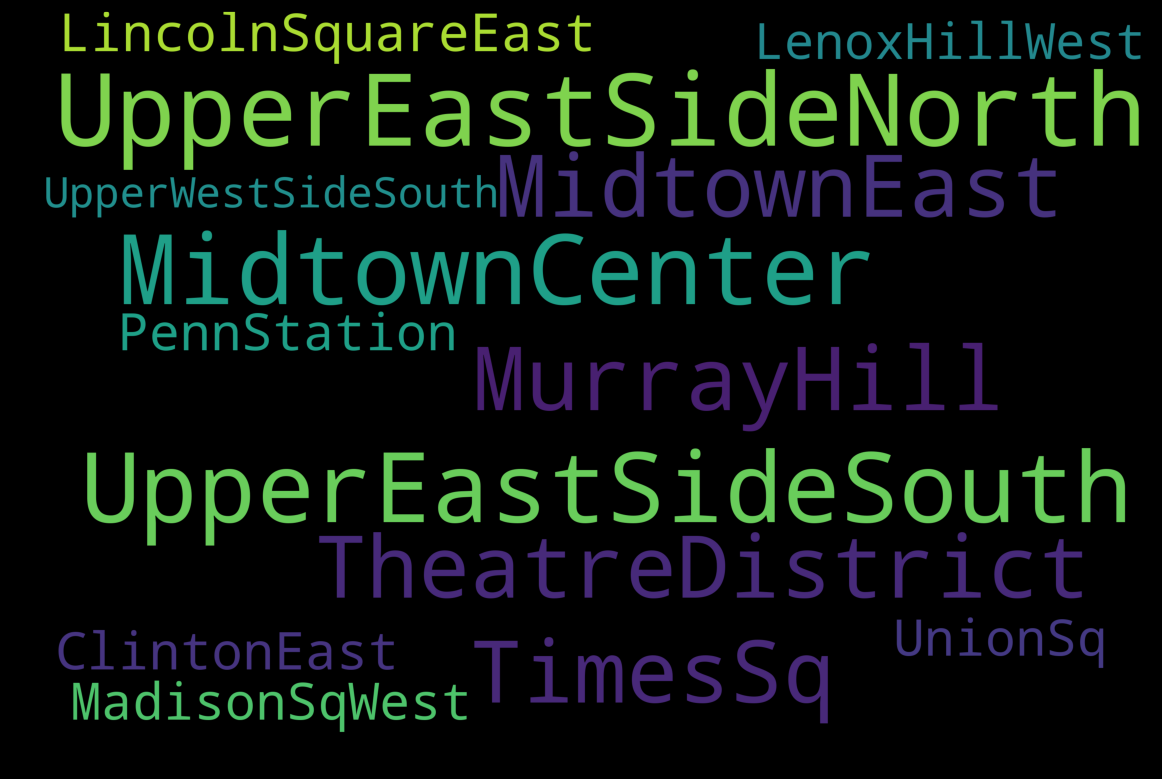

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def generateString(value, location_name):
    result = (" , ".join(location_name for i in range(value)))
    return result

most_visited_place_2019 = most_visited_place_2019 = [["PennStation/MadisonSqWest",1149367],
["LenoxHillWest",1095225],
["UpperWestSideSouth",1077853],
["UnionSq",1110638],
["ClintonEast",1182217],
["LincolnSquareEast",1196053],
["TimesSq/TheatreDistrict",1307430],
["MidtownEast",1306973],
["MurrayHill",1367107],
["MidtownCenter",1677644],
["UpperEastSideSouth",1678466],
["UpperEastSideNorth",1800806]]

cloudText = ""
for j in range(len(most_visited_place_2019)):
    cloudText = cloudText +" , "+generateString(most_visited_place_2019[j-1][1],most_visited_place_2019[j-1][0])

wordcloud = WordCloud(
width = 3000,
height = 2000, collocations=False,
background_color = 'black').generate(str(cloudText))

fig = plt.figure(
figsize = (20, 20),
facecolor = 'k',
edgecolor = 'k')

plt.imshow(wordcloud )

wordcloud.to_file("Word_cloud_Location.png")